In [2]:
import matplotlib.pyplot as plt
import gzip
import numpy as np
import os
def load_data_gz(data_folder):
    files = ['train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz',
             't10k-images-idx3-ubyte.gz']

    paths = []
    for fname in files:
        paths.append(os.path.join(data_folder, fname))

    # 读取每个文件夹的数据
    with gzip.open(paths[0], 'rb') as lbpath:
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[1], 'rb') as imgpath:
        x_train = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 784)

    with gzip.open(paths[2], 'rb') as lbpath:
        y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[3], 'rb') as imgpath:
        x_test = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 784)

    return x_train, y_train, x_test, y_test

# 调用load_data_gz函数加载数据集
data_folder = r'C:\Users\86181\Aconda\machine_learning\mnist_datasets'
x_train_gz, y_train_gz, x_test_gz, y_test_gz = load_data_gz(data_folder)

print('x_train_gz.shape:', x_train_gz.shape)
print('y_train_gz.shape', y_train_gz.shape)
print('x_test_gz.shape:', x_test_gz.shape)
print('y_test_gz.shape:', y_test_gz.shape)

x_train_gz.shape: (60000, 784)
y_train_gz.shape (60000,)
x_test_gz.shape: (10000, 784)
y_test_gz.shape: (10000,)


In [3]:
train_image = np.zeros([60000, 28, 28]).astype(np.float32)
test_image = np.zeros([10000, 28, 28]).astype(np.float32)

for i in range(x_train_gz.shape[0]):
    re = x_train_gz[i, :].reshape(28, 28)
    train_image[i, :, :] = re
for i in range(x_test_gz.shape[0]):
    er = x_test_gz[i, :].reshape(28, 28)
    test_image[i, :, :] = er
print('train_image.shape: ', train_image.shape)
print('test_image.shape: ', test_image.shape)

train_image.shape:  (60000, 28, 28)
test_image.shape:  (10000, 28, 28)


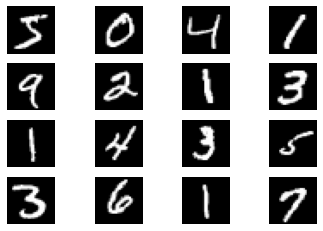

In [4]:
plt.figure()
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(train_image[i, :, :], 'gray')
    plt.axis('off')
plt.show()

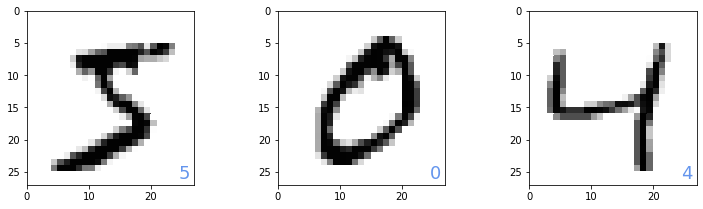

In [5]:
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace = 0.5)
plt.gray()
for id in range(3):
    plt.subplot(1,3,id+1)
    img = train_image[id, :, :]
    plt.pcolor(255-img)
    plt.text(24.5, 26, "%d" % y_train_gz[id], color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
plt.show()

In [6]:
from tensorflow.python.keras.utils import np_utils

#  x_train_gz = x_train_gz.reshape(60000, 784)
x_train_gz = x_train_gz.astype('float32')    #把输入作为实数值处理，所以这里把数据由int转换成float后除255
x_train_gz = x_train_gz / 255                #变为0-1的实数值
num_classes = 10
y_train_gz = np_utils.to_categorical(y_train_gz,num_classes)    # 1-of-k表示法

# x_test_gz = x_test_gz.reshape(10000, 784)
x_test_gz = x_test_gz.astype('float32')
x_test_gz = x_test_gz / 255
y_test_gz = np_utils.to_categorical(y_test_gz, num_classes)


In [7]:
np.random.seed(1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim = 784, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

In [8]:
import time
startTime = time.time()
history = model.fit(x_train_gz, y_train_gz, epochs= 10, batch_size= 1000,
                   verbose= 1, validation_data= (x_test_gz, y_test_gz))
score = model.evaluate(x_test_gz, y_test_gz, verbose= 0)
print('Test loss: ',score[0])
print('Test accuracy: ',score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 2.0439 - accuracy: 0.3785 - val_loss: 1.7671 - val_accuracy: 0.6170
Epoch 2/10
60/60 [==============================] - 0s 6ms/step - loss: 1.5916 - accuracy: 0.7058 - val_loss: 1.4110 - val_accuracy: 0.7709
Epoch 3/10
60/60 [==============================] - 0s 6ms/step - loss: 1.2948 - accuracy: 0.7916 - val_loss: 1.1626 - val_accuracy: 0.8194
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 1.0814 - accuracy: 0.8277 - val_loss: 0.9802 - val_accuracy: 0.8474
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.9230 - accuracy: 0.8500 - val_loss: 0.8440 - val_accuracy: 0.8649
Epoch 6/10
60/60 [==============================] - 0s 6ms/step - loss: 0.8038 - accuracy: 0.8632 - val_loss: 0.7409 - val_accuracy: 0.8764
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.7130 - accuracy: 0.8733 - val_loss: 0.6623 - val_accuracy: 0.8827
Epoch 8/10
60/60 [=

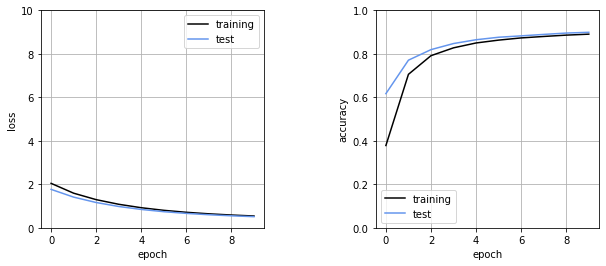

In [10]:
plt.figure(1, figsize= (10, 4))
plt.subplots_adjust(wspace= 0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label= 'training', color='black')
plt.plot(history.history['val_loss'], label='test', color= 'cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label= 'training', color= 'black')
plt.plot(history.history['val_accuracy'], label= 'test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

313/313 [==============================] - 0s 862us/step


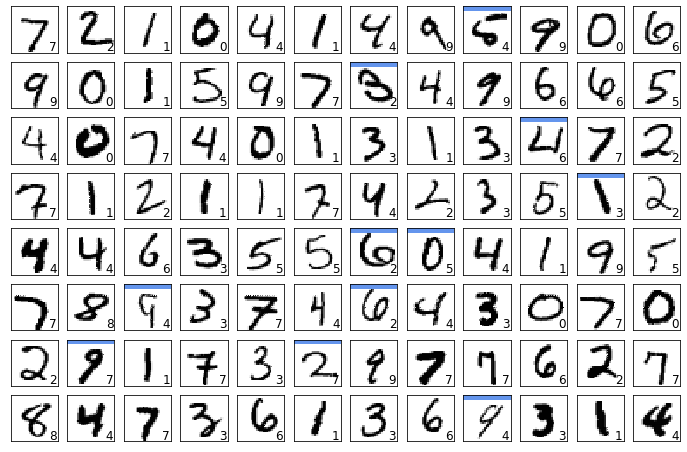

In [14]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test_gz)
    plt.figure(2, figsize= (12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i+1)
        x = x_test_gz[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" %prediction, fontsize = 12)
        if prediction != np.argmax(y_test_gz[i, :]):
            plt.plot([0, 27], [1, 1], color= 'cornflowerblue', linewidth= 5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

#主处理
show_prediction()
plt.show()

In [18]:
np.random.seed(1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

import time
startTime = time.time()
history = model.fit(x_train_gz, y_train_gz, epochs= 10, batch_size= 1000,
                   verbose= 1, validation_data= (x_test_gz, y_test_gz))
score = model.evaluate(x_test_gz, y_test_gz, verbose= 0)
print('Test loss: ',score[0])
print('Test accuracy: ',score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 1.5001 - accuracy: 0.5408 - val_loss: 0.8805 - val_accuracy: 0.8032
Epoch 2/10
60/60 [==============================] - 0s 6ms/step - loss: 0.6788 - accuracy: 0.8337 - val_loss: 0.5198 - val_accuracy: 0.8668
Epoch 3/10
60/60 [==============================] - 0s 6ms/step - loss: 0.4716 - accuracy: 0.8742 - val_loss: 0.4074 - val_accuracy: 0.8916
Epoch 4/10
60/60 [==============================] - 0s 6ms/step - loss: 0.3898 - accuracy: 0.8933 - val_loss: 0.3543 - val_accuracy: 0.9021
Epoch 5/10
60/60 [==============================] - 0s 6ms/step - loss: 0.3469 - accuracy: 0.9044 - val_loss: 0.3218 - val_accuracy: 0.9114
Epoch 6/10
60/60 [==============================] - 0s 6ms/step - loss: 0.3205 - accuracy: 0.9104 - val_loss: 0.3021 - val_accuracy: 0.9164
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3017 - accuracy: 0.9155 - val_loss: 0.2894 - val_accuracy: 0.9194
Epoch 8/10
60/60 [==

313/313 [==============================] - 1s 1ms/step


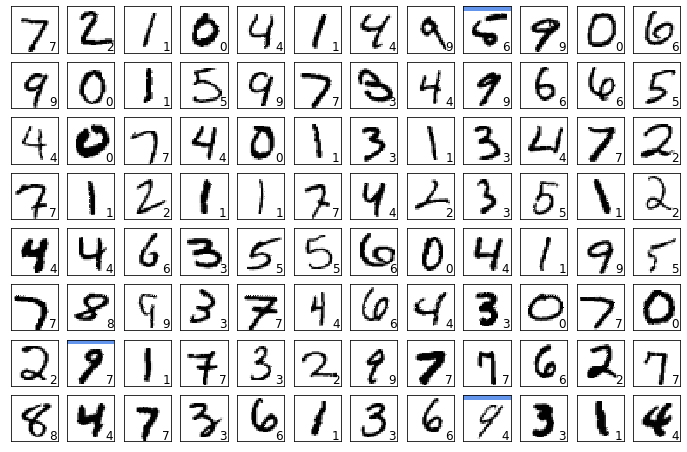

In [19]:
show_prediction()
plt.show()

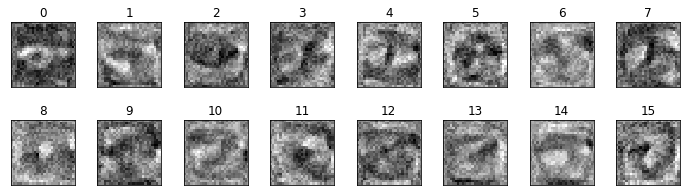

In [20]:
#第一层的权重的可视化
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize= (12, 3))
plt.gray()
plt.subplots_adjust(wspace = 0.35, hspace = 0.5)
for i in range(16):
    plt.subplot(2, 8, i+1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" %i)
plt.show()
    

In [25]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [26]:
import matplotlib.pyplot as plt
import gzip
import numpy as np
import os
def load_data_gz(data_folder):
    files = ['train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz',
             't10k-images-idx3-ubyte.gz']

    paths = []
    for fname in files:
        paths.append(os.path.join(data_folder, fname))

    # 读取每个文件夹的数据
    with gzip.open(paths[0], 'rb') as lbpath:
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[1], 'rb') as imgpath:
        x_train = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 784)

    with gzip.open(paths[2], 'rb') as lbpath:
        y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[3], 'rb') as imgpath:
        x_test = np.frombuffer(imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 784)

    return x_train, y_train, x_test, y_test

# 调用load_data_gz函数加载数据集
data_folder = r'C:\Users\86181\Aconda\machine_learning\mnist_datasets'
x_train_gz, y_train_gz, x_test_gz, y_test_gz = load_data_gz(data_folder)

print('x_train_gz.shape:', x_train_gz.shape)
print('y_train_gz.shape', y_train_gz.shape)
print('x_test_gz.shape:', x_test_gz.shape)
print('y_test_gz.shape:', y_test_gz.shape)

x_train_gz.shape: (60000, 784)
y_train_gz.shape (60000,)
x_test_gz.shape: (10000, 784)
y_test_gz.shape: (10000,)


In [27]:
from tensorflow.python.keras.utils import np_utils

x_train_gz = x_train_gz.reshape(60000, 28, 28, 1)
x_test_gz = x_test_gz.reshape(10000, 28, 28, 1)
x_train_gz = x_train_gz.astype('float32')
x_test_gz = x_test_gz.astype('float32')
x_train_gz /= 255
x_test_gz /= 255
num_classes = 10
y_train_gz = np_utils.to_categorical(y_train_gz, num_classes)
y_test_gz = np_utils.to_categorical(y_test_gz, num_classes)

print('x_train_gz.shape:', x_train_gz.shape)
print('y_train_gz.shape', y_train_gz.shape)
print('x_test_gz.shape:', x_test_gz.shape)
print('y_test_gz.shape:', y_test_gz.shape)

x_train_gz.shape: (60000, 28, 28, 1)
y_train_gz.shape (60000, 10)
x_test_gz.shape: (10000, 28, 28, 1)
y_test_gz.shape: (10000, 10)


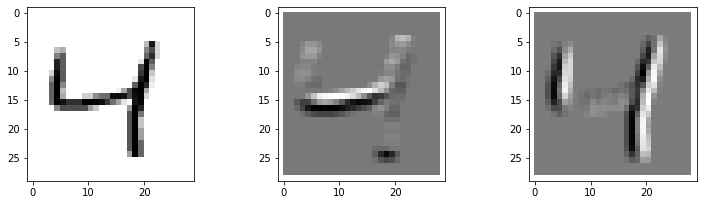

In [28]:
#空间过滤器
id_img = 2
myfil1 = np.array([[1, 1, 1],
                    [1, 1, 1],
                    [-2, -2, -2]], dtype = float)
myfil2 = np.array([[-2, 1, 1],
                   [-2, 1, 1],
                   [-2, 1, 1]], dtype=float)
x_img = x_train_gz[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

#过滤器处理
for ih in range(img_h - 3 + 1):
    for iw in range(img_w - 3 + 1):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
#         print(img_part.shape)
        out_img1[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil2.reshape(-1))
        
#-----显示
plt.figure(1, figsize= (12, 3.2))
plt.subplots_adjust(wspace = 0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

In [29]:
#由于1个过滤器的输出为28 x28的数组，所以全部输出合在 一起是28 X 28 X 8的三维数组，
#我们把它展开为一维的长度为6272的数 组，并与10个输出层神经元全连接

np.random.seed(1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train_gz, y_train_gz, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test_gz, y_test_gz))
score = model.evaluate(x_test_gz, y_test_gz, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print("Computation time: {0:.3f} sec".format(time.time()-startTime))

Epoch 1/20
60/60 [==============================] - 6s 82ms/step - loss: 1.2868 - accuracy: 0.7666 - val_loss: 0.4732 - val_accuracy: 0.8739
Epoch 2/20
60/60 [==============================] - 5s 80ms/step - loss: 0.3772 - accuracy: 0.8948 - val_loss: 0.2925 - val_accuracy: 0.9199
Epoch 3/20
60/60 [==============================] - 5s 76ms/step - loss: 0.2714 - accuracy: 0.9234 - val_loss: 0.2318 - val_accuracy: 0.9362
Epoch 4/20
60/60 [==============================] - 4s 75ms/step - loss: 0.2182 - accuracy: 0.9387 - val_loss: 0.1881 - val_accuracy: 0.9494
Epoch 5/20
60/60 [==============================] - 5s 75ms/step - loss: 0.1805 - accuracy: 0.9500 - val_loss: 0.1591 - val_accuracy: 0.9556
Epoch 6/20
60/60 [==============================] - 4s 75ms/step - loss: 0.1528 - accuracy: 0.9575 - val_loss: 0.1370 - val_accuracy: 0.9618
Epoch 7/20
60/60 [==============================] - 5s 75ms/step - loss: 0.1323 - accuracy: 0.9633 - val_loss: 0.1235 - val_accuracy: 0.9657
Epoch 8/20
60

313/313 [==============================] - 1s 3ms/step


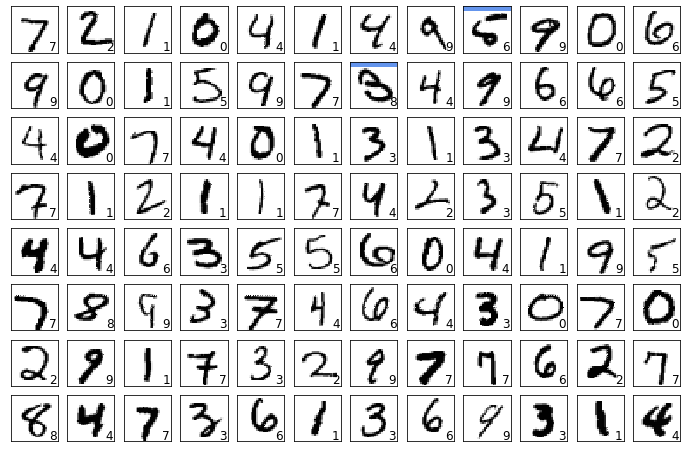

In [30]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test_gz)
    plt.figure(2, figsize= (12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i+1)
        x = x_test_gz[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" %prediction, fontsize = 12)
        if prediction != np.argmax(y_test_gz[i, :]):
            plt.plot([0, 27], [1, 1], color= 'cornflowerblue', linewidth= 5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

#主处理
show_prediction()
plt.show()

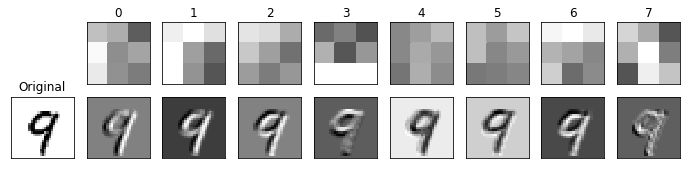

In [32]:
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test_gz[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

w = model.layers[0].get_weights()[0]
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i+2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([],"")
    plt.yticks([],"")    
    plt.title("%d" %i)
    plt.subplot(2, 9, i+11)
    out_img = np.zeros_like(x_img)
    #过滤器处理
    for ih in range(img_h - 3 + 1):
        for iw in range(img_w - 3 + 1):
            img_part = x_img[ih:ih + 3, iw:iw + 3]
            out_img[ih + 1,iw + 1] = np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

In [36]:
import numpy as np 
np.random.seed(1) 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.optimizers import Adam 
import time

model = Sequential()
model.add(Conv2D(16, (3, 3), 
                input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])

startTime = time.time()

history = model.fit(x_train_gz, y_train_gz, batch_size=1000, epochs=20, 
                   verbose=1, validation_data=(x_test_gz, y_test_gz))

score = model.evaluate(x_test_gz, y_test_gz, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
print("Computation time:{0:.3f} sec".format(time.time()-startTime))

Epoch 1/20
60/60 [==============================] - 23s 377ms/step - loss: 0.6573 - accuracy: 0.7958 - val_loss: 0.1208 - val_accuracy: 0.9611
Epoch 2/20
60/60 [==============================] - 25s 409ms/step - loss: 0.1339 - accuracy: 0.9588 - val_loss: 0.0615 - val_accuracy: 0.9814
Epoch 3/20
60/60 [==============================] - 25s 425ms/step - loss: 0.0857 - accuracy: 0.9742 - val_loss: 0.0457 - val_accuracy: 0.9844
Epoch 4/20
60/60 [==============================] - 25s 408ms/step - loss: 0.0663 - accuracy: 0.9798 - val_loss: 0.0361 - val_accuracy: 0.9883
Epoch 5/20
60/60 [==============================] - 25s 417ms/step - loss: 0.0571 - accuracy: 0.9827 - val_loss: 0.0327 - val_accuracy: 0.9889
Epoch 6/20
60/60 [==============================] - 25s 409ms/step - loss: 0.0480 - accuracy: 0.9852 - val_loss: 0.0267 - val_accuracy: 0.9910
Epoch 7/20
60/60 [==============================] - 24s 408ms/step - loss: 0.0427 - accuracy: 0.9872 - val_loss: 0.0264 - val_accuracy: 0.9908

313/313 [==============================] - 2s 7ms/step


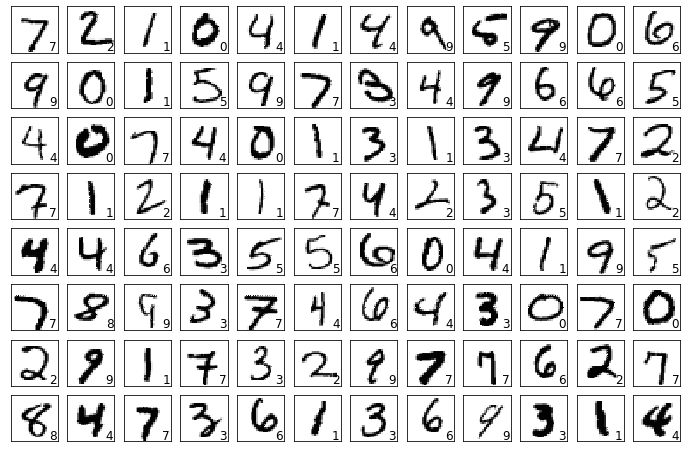

In [37]:
show_prediction()
plt.show()